In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [4]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [5]:
yearsFilter = [2010, 2011, 2012, 2013, 2014]


In [6]:
countryFilter = random.sample(countries, 2)# note this

In [7]:
countryFilter

['Least developed countries: UN classification', 'Lao PDR']

In [8]:
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter 

['Net bilateral aid flows from DAC donors, Belgium (current US$)']

In [9]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))

In [10]:
country1_data = data.loc[filterMesh]# note this

In [11]:
country1_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4850155,Least developed countries: UN classification,LDC,"Net bilateral aid flows from DAC donors, Belgi...",DC.DAC.BELL.CD,2010,1.083550e+09
5036563,Least developed countries: UN classification,LDC,"Net bilateral aid flows from DAC donors, Belgi...",DC.DAC.BELL.CD,2011,7.234300e+08
5212673,Least developed countries: UN classification,LDC,"Net bilateral aid flows from DAC donors, Belgi...",DC.DAC.BELL.CD,2012,4.443300e+08
5386901,Least developed countries: UN classification,LDC,"Net bilateral aid flows from DAC donors, Belgi...",DC.DAC.BELL.CD,2013,4.958300e+08


In [12]:
len(country1_data)

4

In [13]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))

In [14]:
country2_data = data.loc[filterMesh]

In [15]:
len(country2_data)

4

In [16]:
filteredData1 = []
filteredData2 = []


In [17]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years.
# brings up the discussion of missing data/ missing fields
# until we find full data

while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


Skipping ... ['Age dependency ratio, young (% of working-age population)'] since very few rows (0) found
Skipping ... ['Net ODA received (% of central government expense)'] since very few rows (0) found
Skipping ... ['Other manufacturing (% of value added in manufacturing)'] since very few rows (0) found


In [18]:
indicatorsFilter

['Fixed broadband subscriptions']

In [19]:
len(filteredData1)

5

In [20]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [21]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)
    

In [22]:
filteredData1 = filteredData1[0:small]
filteredData2 = filteredData2[0:small]

In [23]:
filteredData1

,CountryName,IndicatorName,Year,Value
5016801,United Arab Emirates,Fixed broadband subscriptions,2010,786818.0
5193552,United Arab Emirates,Fixed broadband subscriptions,2011,866968.0
5368683,United Arab Emirates,Fixed broadband subscriptions,2012,954988.0
5526257,United Arab Emirates,Fixed broadband subscriptions,2013,1041934.0
5636533,United Arab Emirates,Fixed broadband subscriptions,2014,1087035.0


In [24]:
filteredData2

,CountryName,IndicatorName,Year,Value
5008699,Timor-Leste,Fixed broadband subscriptions,2010,500.0
5186045,Timor-Leste,Fixed broadband subscriptions,2011,550.0
5361228,Timor-Leste,Fixed broadband subscriptions,2012,600.0
5519483,Timor-Leste,Fixed broadband subscriptions,2013,700.0
5631948,Timor-Leste,Fixed broadband subscriptions,2014,800.0


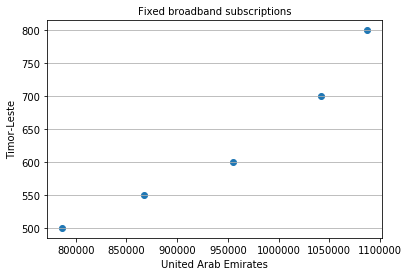

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0], fontsize = 10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0], fontsize = 10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0], fontsize = 10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X,Y)

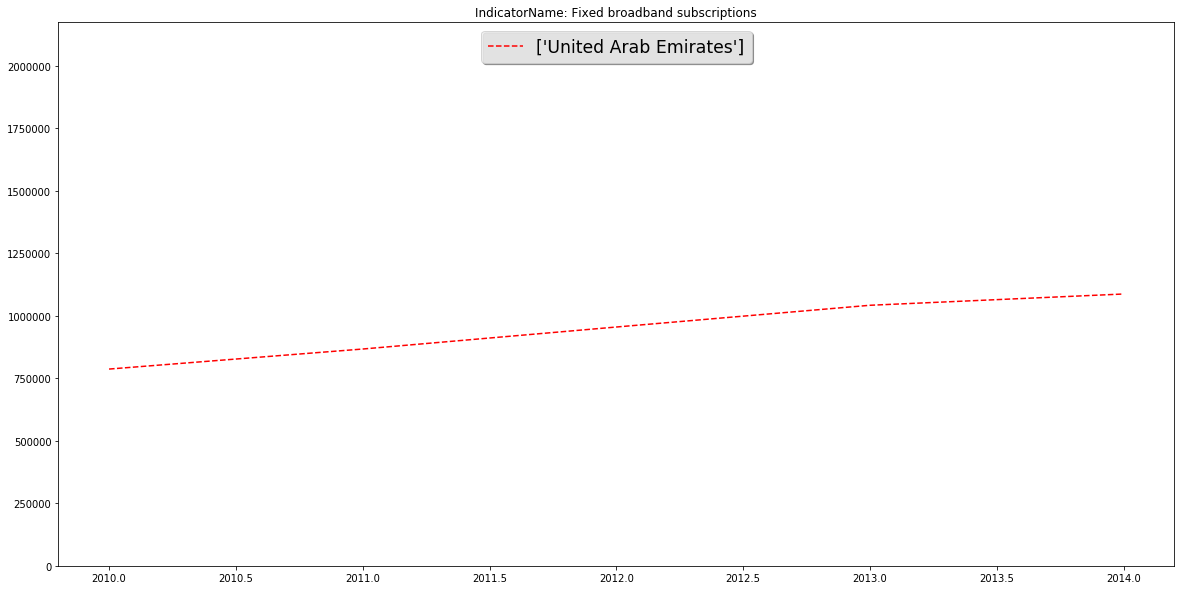

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylim(min(0, filteredData1['Value'].min()), 2* filteredData1['Value'].max())
ax.set_title('IndicatorName: '+ indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'], 'r--', label = filteredData1['CountryName'].unique())

#add the legend
legend = plt.legend(loc = 'upper center',
                   shadow = True, 
                   prop = {'weight': 'roman', 'size': 'xx-large'})

#rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

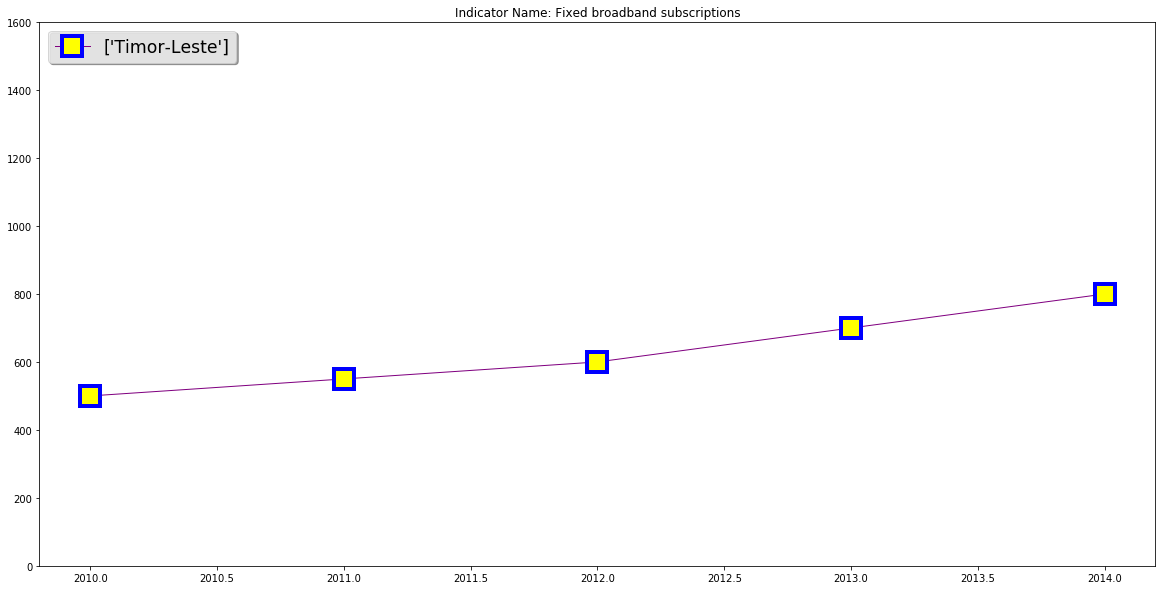

In [27]:
fig, ax = plt.subplots(figsize = (20,10))

ax.set_ylim(min(0, filteredData2['Value'].min()), 2* filteredData2['Value'].max())

ax.set_title('Indicator Name: '+ indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'],
       label = filteredData2['CountryName'].unique(),
       color = "purple", lw = 1, ls = '-',
       marker = 's', markersize = 20,
       markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue")

legend = plt.legend(loc= 'upper left',
                   shadow = True,
                   prop = {'weight': 'roman', 'size': 'xx-large'})

frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm


In [29]:
countof_angles = 36
countof_radii = 8

#array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint = False)
array_ang = np.repeat(array_ang[..., npnewaxis], countof_radii, axis = 1)

x = np.append(0, (array_rad* np.cos(array_ang)).flatten())
y = np.append(0, (array_rad* np.sin(array_and)).flatten())

NameError: name 'npnewaxis' is not defined